# 함수 정의하기

인스타그램 검색 결과 URL을 만들어서 접속하기 (insta_searching 함수 만들기)

In [1]:
#함수 작성
def insta_searching(word):  #word라는 매개변수를 받는 insta_searching 이라는 함수 생성
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

첫번째 게시글 열기 (selet_first 함수 만들기)

In [2]:
#열린 크롬으로 개발자 도구 활용하여 첫번째 게시물 태그 확인 (<div class="_9AhH0"></div>)
#첫번째 게시물 찾아 클릭 함수 만들기

import time

def select_first(driver):
    first = driver.find_element_by_css_selector('div._9AhH0') #find_element_by_css_selector 함수를 사용해 요소 찾기
    first.click()
    time.sleep(3) #로딩을 위해 3초 대기

게시글 정보 가져오기 (get_content 함수 만들기)

In [5]:
#본문 내용, 작성 일시, 위치 정보 및 해시태그(#) 추출

import re

def get_content(driver):
    # 1. 현재 페이지의 HTML 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    # 2. 본문 내용 가져오기
    try:                                         #여러 태그중 첫번째([0]) 태그를 선택  
        content = soup.select('div.C4VMK > span')[0].text #첫 게시글 본문 내용이 <div class="C4VMK"> 임을 알 수 있다.
                                #태그명이 div, class명이 C4VMK인 태그 아래에 있는 span 태그를 모두 선택.
    except:
        content = ' ' 
        
    # 3. 본문 내용에서 해시태그 가져오기(정규표현식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content) 
        # content 변수의 본문 내용 중 #으로 시작하며, #뒤에 연속된 문자(공백이나 #, \ 기호가 아닌 경우)를 모두 찾아 tags 변수에 저장
    
    # 4. 작성 일자 가져오기
    try:
        date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10] #앞에서부터 10자리 글자
    except:
        date = ''

    # 5. 좋아요 수 가져오기
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]
    except:
        like = 0
        
    # 6. 위치 정보 가져오기
    try:
        place = soup.select('div.JF9hh')[0].text
    except:
        place = ''
    
    # 7. 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data

다음 게시글 열기 (move_next 함수 만들기)

In [6]:
def move_next(driver):
    right = driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow') 
    right.click()
    time.sleep(3)

☆ 여러 게시글 정보 수집하기 (만든 함수들로 코딩하기)

In [8]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

# 1. 크롬으로 인스타그램 - '사당맛집' 검색
driver = webdriver.Chrome("C:\\Users\\KIM EUNKI\\anaconda3\\chromedriver.exe")
word = '사당맛집'
url = insta_searching(word)
driver.get(url) 
time.sleep(4)

# 2. 로그인 하기
login_section = '//*[@id="react-root"]/section/nav/div[2]/div/div/div[3]/div/span/a[1]/button'
driver.find_element_by_xpath(login_section).click()
time.sleep(3)


elem_login = driver.find_element_by_name("username")
elem_login.clear()
elem_login.send_keys('ekey_11_11')

elem_login = driver.find_element_by_name('password')
elem_login.clear()
elem_login.send_keys('test12345')

time.sleep(1)

xpath = """//*[@id="react-root"]/section/main/div/article/div/div[1]/div/form/div[4]/button"""
driver.find_element_by_xpath(xpath).click()

time.sleep(4)

xpath1 = """//*[@id="react-root"]/section/main/div/div/div/div/button"""
driver.find_element_by_xpath(xpath1).click()
time.sleep(4)

# 3. 검색페이지 접속하기
driver.get(url)
time.sleep(4)

# 4. 첫번째 게시글 열기
select_first(driver)

# 5. 비어있는 변수(results) 만들기
results = []

# 여러 게시물 크롤링하기
target = 1000 #크롤링할 게시물 수
for i in range(target):
    data = get_content(driver) #게시물 정보 가져오기
    results.append(data)
    move_next(driver)
    
print(results[:2])

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"a._65Bje.coreSpriteRightPaginationArrow"}
  (Session info: chrome=83.0.4103.106)


In [15]:
#1000개 추출 중에 오류가 나서 712개 추출됨.

import pandas as pd
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'like', 'place', 'tags']

In [16]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  712 non-null    object
 1   data     712 non-null    object
 2   like     712 non-null    object
 3   place    712 non-null    object
 4   tags     712 non-null    object
dtypes: object(5)
memory usage: 27.9+ KB


In [30]:
results_df['tags']

0      [#당산오돌한번, #사당맛집, #사당역마...
1      [#얼쑤, #신토불이, #사당맛집, #사당역맛집, #사당역모임장소, #사당회식장소,...
2        [#사당역맛집, #사당맛집, #사당회식장소, #사당고기집, #사당모임, #흑돼지맛집]
3                                                     []
4      [#사당맛집, #사당족발, #사당역맛집, ...
                             ...                        
707    [#이수역유다, #이수역, #이수, #이수역맛집, #이수맛집, #사당, #사당맛집,...
708                                                   []
709                                   [#샤로수길, #킷사서울샤로수길]
710    [#100족발.., #사당맛집, #사당역맛집, #사당술집, #사당역술집, #사당역족...
711    [#서초맛집, #대게나라서초점, #코로나19, #대게_가격, #서초역맛집, #예술의...
Name: tags, Length: 712, dtype: object

In [24]:
#1000개를 크롤링 후 출력은 2개만 해보았다.

수집한 데이터 엑셀파일로 저장하기

In [26]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'like', 'place', 'tags']
results_df.to_excel("C:\\Users\\KIM EUNKI\\Google 드라이브\\GitHub\\Practice\\Insta_Sadang.xlsx")

In [76]:
results_df

,content,data,like,place,tags
0,#당산오돌한번 꽂힌 이후로 주기적으로 ᄀ...,2020-05-26,0,,"[#당산오돌한번, #사당맛집, #사당역마..."
1,사당역 최애 맛집 고을래이베리코흑돼지!.내가 제일 자주가는 이베리코흑돼지맛집!고기집...,2020-06-02,0,,"[#사당역맛집, #사당맛집, #사당회식장소, #사당고기집, #사당모임, #흑돼지맛집]"
2,어제 진짜 더웠어요 ㅠ 🤢오늘은 그나마 시원ᄒ...,2020-06-12,0,,"[#비앤미의원, #턱끝필러, #앞턱필러, #ᄆ..."
3,..취향저격 맛집 👊이수에서~ 사당까지!내 이...,2020-06-04,0,,"[#사당맛집, #사당족발, #사당역맛집, ..."
4,-일하다먹는 앙버떡 꿀맛❤️매장에 여유이...,2020-06-06,0,,"[#떡, #이수떡집, #정애맛담, #민속떡지..."
...,...,...,...,...,...
95,#계탄언니 #사당맛집 #사당닭갈비#닭갈비맛집with #와인한잔 👍,2020-06-15,0,,"[#계탄언니, #사당맛집, #사당닭갈비, #닭갈비맛집with, #와인한잔]"
96,사당역 10번출구에서 1분거리라서 접근성이 좋은#100족발..#사당맛집 #사당역맛집...,2020-06-15,0,,"[#100족발.., #사당맛집, #사당역맛집, #사당술집, #사당역술집, #사당역족..."
97,.혼자 다 먹었다시그니처 버거 남바완 메뉴ᄅ...,2020-06-15,0,,"[#사당맛집, #릿잇타미, #수제버거, #사당]"
98,신이나 신이나 엣헴엣헴 신이나,2020-06-15,0,,[]


In [27]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   data     1000 non-null   object
 2   like     1000 non-null   int64 
 3   place    1000 non-null   object
 4   tags     1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


# 워드클라우드 만들어보기

크롤링 결과 중 해시태그 데이터 불러오기

In [23]:
import pandas as pd
raw_total = pd.read_excel("C:\\Users\\KIM EUNKI\\Google 드라이브\\GitHub\\Practice\\Instagram_Crawling\\Insta_Sadang.xlsx")
raw_total['tags']

0      ['#당산오돌한번', '#사당맛집', '#사당...
1      ['#사당역맛집', '#사당맛집', '#사당회식장소', '#사당고기집', '#사당모...
2      ['#사당맛집', '#사당족발', '#사당역맛...
3      ['#교대맛집', '#교대맛집추천', '#교대술집', '#서초동맛집', '#서초동술...
4      ['#사당맛집', '#사당족발', '#사당역맛...
                             ...                        
995    ['#100족발와서', '#사당맛집', '#사당역맛집', '#사당술집', '#사당역...
996    ['#네일바이리', '#사당네일아트', '#nailart'...
997    ['#사당맛집', '#철판왕', '#좋아요', '#ᄌ...
998    ['#100족발..', '#사당맛집', '#사당역맛집', '#사당술집', '#사당역...
999                                                   []
Name: tags, Length: 1000, dtype: object

In [24]:
#해시태그 통합저장
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [27]:
tags_total[:10]

['#당산오돌한번',
 '#사당맛집',
 '#사당역맛집',
 '#사당고기집',
 '#사당맛집추천',
 '#사당역맛집',
 '#사당맛집',
 '#사당회식장소',
 '#사당고기집',
 '#사당모임']

In [28]:
#빈도수 집계
from collections import Counter
tags_counts = Counter(tags_total)

In [29]:
tags_counts.most_common(30) #가장 많이 사용된 상위 10개의 해시태그
#사당맛집이라는 해시태그가 가장 많이 사용됨을 알 수 있다.

[('#사당맛집', 628),
 ('#사당역맛집', 397),
 ('#이수맛집', 365),
 ('#이수역맛집', 360),
 ('#사당술집', 331),
 ('#방배동맛집', 324),
 ('#서초맛집', 313),
 ('#사당회식장소', 310),
 ('#서초구맛집', 308),
 ('#사당역술집', 305),
 ('#동작구맛집', 305),
 ('#맛집스타그램', 304),
 ('#족발맛집', 302),
 ('#사당족발', 296),
 ('#사당역족발', 294),
 ('#사당맛집100족발', 292),
 ('#100족발..', 179),
 ('#사당맛집', 134),
 ('', 132),
 ('#사당', 93),
 ('#먹스타그램', 80),
 ('#맛스타그램', 78),
 ('#100족발', 76),
 ('#사당역', 51),
 ('#맛스타그램', 50),
 ('#먹스타그램', 47),
 ('#방배맛집', 46),
 ('#이수맛집', 42),
 ('#일상', 37),
 ('#사당', 34)]

In [49]:
#위치정보가 저장되어 있는 데이터 빈도수 집계
raw_total['place'].value_counts()

사당역        45
사당 어딘가     26
이수역        17
카페 오다가다     8
파니모들        8
           ..
카페,진리       1
묵리459       1
방배족발        1
보태닉마켓       1
구미시 송정동     1
Name: place, Length: 135, dtype: int64

In [50]:
pd.DataFrame(raw_total['place'].value_counts())

,place
사당역,45
사당 어딘가,26
이수역,17
카페 오다가다,8
파니모들,8
...,...
"카페,진리",1
묵리459,1
방배족발,1
보태닉마켓,1


In [35]:
#막대차트 그려보기
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform in ['darwin']:
    font_name = 'AppleGothic'
    
rc('font', family = font_name)

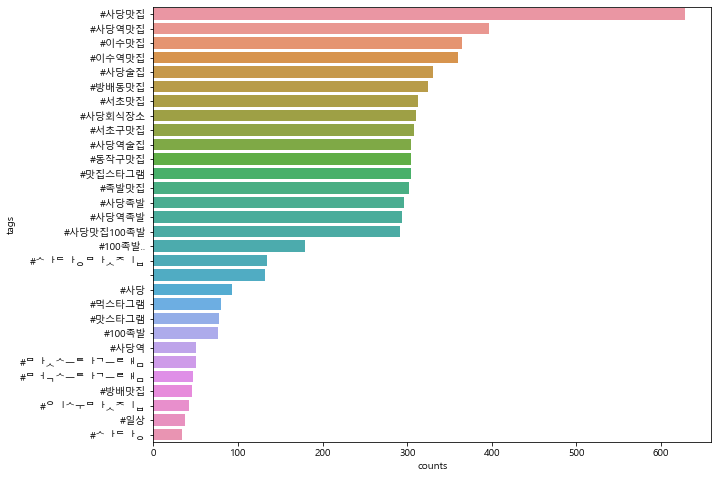

In [36]:
tag_counts_df = pd.DataFrame(tags_counts.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

plt.figure(figsize = (10, 8))
sns.barplot(x='counts', y='tags', data=tag_counts_df)

In [37]:
#워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':
    font_path = 'c:\\windows\\Fonts\\malgun.ttf'

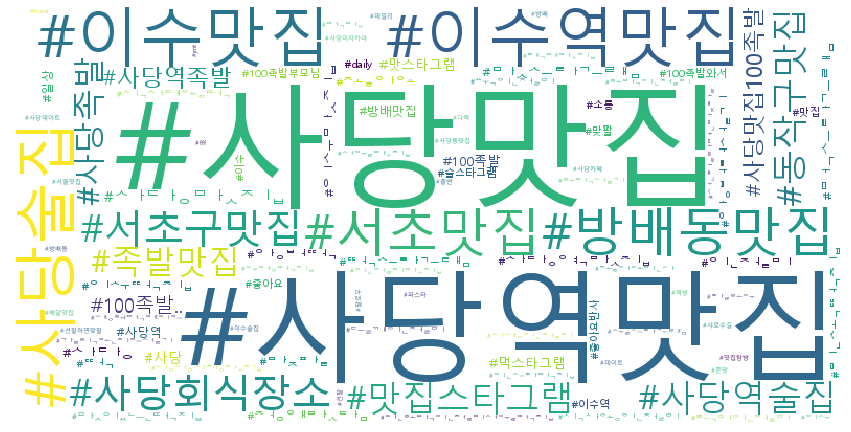

In [38]:
wordcloud = WordCloud(font_path = font_path,
                     background_color = 'white',
                     max_words = 100,
                     relative_scaling = 0.3,
                     width = 800,
                     height = 400,).generate_from_frequencies(tags_counts)

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("C:\\Users\\KIM EUNKI\\Google 드라이브\\GitHub\\Practice\\Insta_Sadang_WordCloud.png")